In [1]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the csv file from the path
loan = pd.read_csv('D:\Learning\AI_ML\Lending Club Case Study\loan\loan.csv',dtype=object)


In [3]:
# checking the missing values in the dataframe
print('null values in rows')
print(loan.isnull().all(axis=1).sum())

# no empty rows

null values in rows
0


In [4]:
# Finding columns where all the values are null
print('Null values in Columns')
print(loan.isnull().all(axis=0).sum())

Null values in Columns
54


In [5]:
# checking the null columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#dropping the null columns (containing all the values as null)
loan = loan.dropna(how = 'all',axis = 1)
loan.shape

(39717, 57)

In [7]:
# dropping the remaining unwanted columns
loan.drop(["desc", "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d", "member_id", "url", "emp_title", "zip_code", "tax_liens"], axis =1, inplace=True)

In [8]:
# Getting the shape of the Loan Dataframe after dropping the unwanted columns

loan.shape

# now we have only 48 columns

(39717, 48)

In [9]:
# Cleaning the Data
# Getting the emp_length column with only numbers 

loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan['emp_length'].head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: object

In [10]:
# Cleaning the Data
# Removing the % symbol from Int_rate column
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

# Removing the % symbol from revol_util column
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

In [11]:
# Checking the numeric values for loan_amnt
#s = '²3455'
s = str(loan.loan_amnt)
print(s.isnumeric())

False


In [12]:
# As the Loan Status plays the vital role in deriving the data , analysing and concluding, we are getting the percentage values for the status of the Loan

(loan.loan_status.value_counts()*100)/len(loan)

#Fully Paid    82.96%
#Charged Off   14.17%
#Current        2.87%

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [13]:

# Analysing the purpose of loan in total loans issued

(loan.purpose.value_counts()*100)/len(loan)

#debt_consolidation   46.93%
#credit_card          12.92%

# So the above two were used in more numbers

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

Text(0, 0.5, 'Loan Amount')

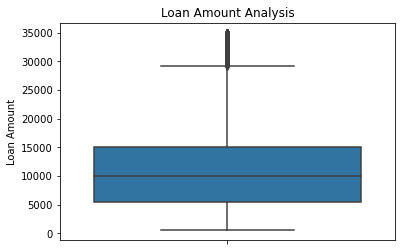

In [14]:
# Univariate Analysis for Loan Amount in Boxplot
loan.loan_amnt = loan['loan_amnt'].apply(pd.to_numeric)
B = sns.boxplot(y=loan.loan_amnt)
B.set_title('Loan Amount Analysis')
B.set_ylabel('Loan Amount')

In [15]:
# Description about total payment
loan.total_pymnt.describe()

count           39717
unique          37850
top       11196.56943
freq               26
Name: total_pymnt, dtype: object

In [16]:
# Converting the string columns having numbers to numeric for better analysis

StringColumns = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[StringColumns] = loan[StringColumns].apply(pd.to_numeric)


In [17]:
# Removing the outliers for the annual_inc column

loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]


print(loan["annual_inc"].describe())

# This helped us to remove the uncommon values i.e, outliers which are irrelevant for the analysis.

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64


In [18]:
# univariate analysis for int_rate

loan['int_rate'].describe()



count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

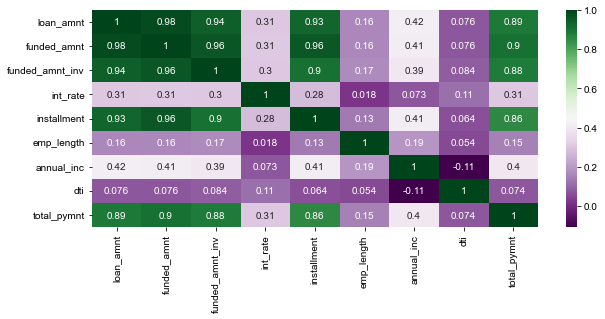

In [19]:
# Bivariate Analysis 

# Heat Map


plt.figure(figsize=(10,4))
B = sns.heatmap(loan.corr(),annot=True,cmap="PRGn")
sns.set(font_scale=1)
plt.show()

# using the cluster map it is clear that the Loan amount , funded amount , installment and total payment are highly correlated.

# Annual income with DTI(Debt-to-income ratio) is negatively correlated.

# So less income and more loans can affect the income to the bank

In [20]:
# Data cleaning
# Dropping the unwanted columns
loan.drop(["application_type","policy_code","initial_list_status","installment","pymnt_plan"], axis =1, inplace=True)
print(loan.shape)
loan.isnull().sum()

(39319, 43)


id                              0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
title                          11
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                     49
total_acc                       0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_in

In [21]:
# Lets take a look on shape and data
print(loan.shape)
loan.head(1)
# Observation is we have created extra 5 columns after dropping many.

(39319, 43)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,B,B2,10,RENT,...,0,0,Jan-15,171.62,May-16,0,0,0,0,0


Text(0.5, 0, 'Loan Amount')

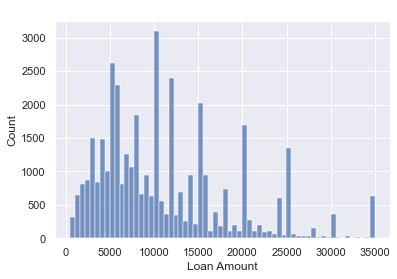

In [22]:
# Analysing for Loan Amount

B = sns.histplot(loan['loan_amnt'])
B.set_title('Loan Amount ',fontsize=12,color='w')
B.set_xlabel('Loan Amount')

# Loans are high in the range of 10000 to 15000

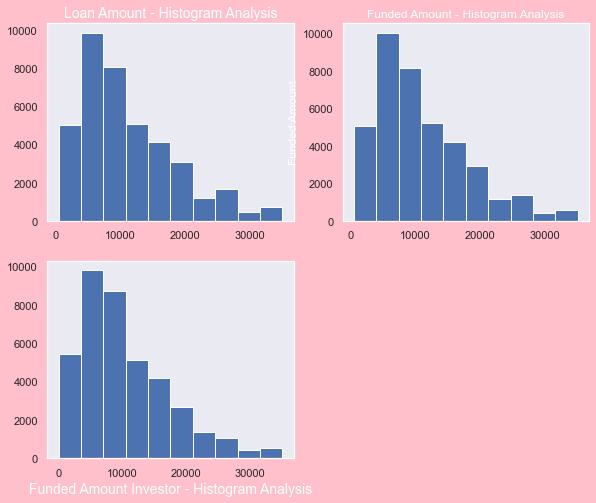

In [23]:
# Histogram Analysis of the variable loan_amnt , funded_amnt and Funded Amount Inv as these three are highly correlated.

plt.figure(figsize=(15,8),facecolor='pink')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = plt.hist(loan['loan_amnt'])
plt.title('Loan Amount - Histogram Analysis',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 3, 2)
ax = plt.hist(loan['funded_amnt'])
plt.title('Funded Amount - Histogram Analysis',fontsize=12,color='w')

plt.ylabel('Funded Amount',fontsize=12,color='w')
# subplot 2
plt.subplot(2, 3, 4)
ax = plt.hist(loan['funded_amnt_inv'])
plt.xlabel('Funded Amount Investor - Histogram Analysis',fontsize=14,color='w')
plt.show()


Text(0.5, 0, 'Interest Rate')

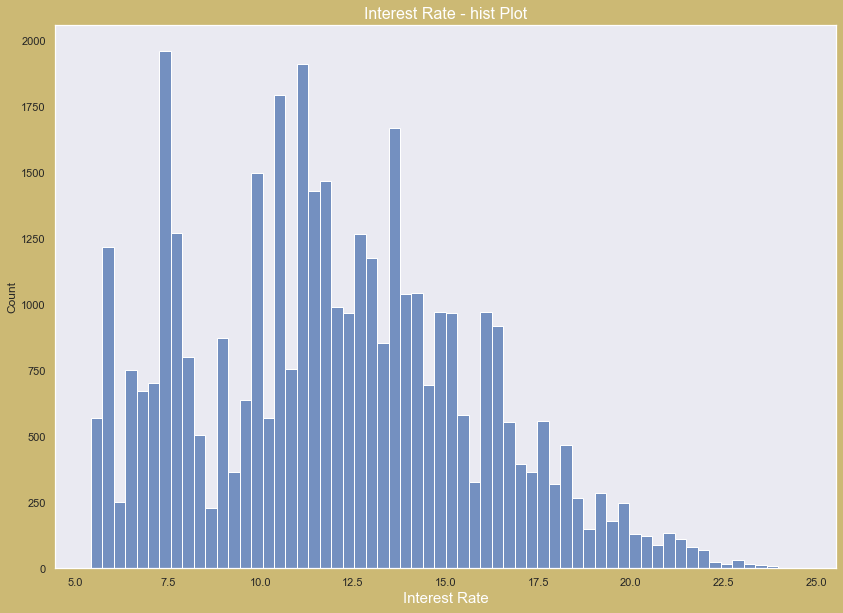

In [24]:
# Analysing on the interest rate

plt.figure(figsize=(14,10),facecolor='y')
sns.set_style("dark")

B = sns.histplot(loan['int_rate'])
B.set_title('Interest Rate - hist Plot',fontsize=16,color='w')
B.set_xlabel('Interest Rate',fontsize=15,color='w')


# Below plot shows that the interest rate is higher approximately at 7.5% and 10-12%

<AxesSubplot:xlabel='loan_status', ylabel='count'>

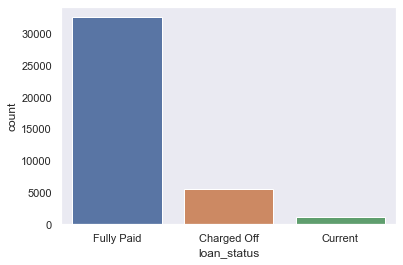

In [25]:
# To check the Loan_status which includes the Fullypaid,chargedOff and Current.
sns.countplot(loan.loan_status)

So the "Charged Off" is not higher as "Fully Paid"

In [26]:
loan.annual_inc.describe()

# Here the max Annual income is around 2.35L

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x25e5c8c3b20>,
 'caps': [<matplotlib.lines.Line2D at 0x25e5c8d7280>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e5c8c3790>],
 'medians': [<matplotlib.lines.Line2D at 0x25e5c8d79a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e5c8d7d30>],
 'means': []}

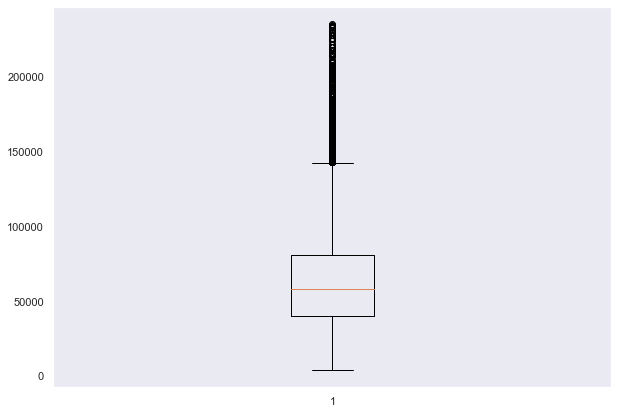

In [27]:
plt.figure(figsize = (10,7))
plt.boxplot(loan.annual_inc)

## Bivariate Analysis

In [28]:

print(max(loan.loan_amnt))

# Since the maximum loan_amnt is 35000, we can segregate the data into 5 different bins
AnnulIncomeAndLoanStatus = loan[['loan_amnt','loan_status','annual_inc']]
AnnulIncomeAndLoanStatus['loan_amnt_derived'] = pd.cut(loan['loan_amnt'][loan.loan_status=='Charged Off'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000','25000-30000', '30000 and above'])
AnnulIncomeAndLoanStatus['Annual_income_derived'] = pd.cut(loan['annual_inc'][loan.loan_status=='Charged Off'], [0, 30000, 60000, 90000, 120000, 180000, 210000, 230000], labels=['0-30000', '30000-60000', '60000-90000', '90000-120000','120000-180000','180000-210000', '210000 and above'])
AnnulIncomeAndLoanStatus = AnnulIncomeAndLoanStatus[loan.loan_status=='Charged Off']
AnnulIncomeAndLoanStatus['ChargedOffPervalues'] = AnnulIncomeAndLoanStatus.loan_amnt/sum(loan.loan_amnt)
AnnulIncomeAndLoanStatus.head(10)


# The Maximum Loan Amount is 35000



35000


,loan_amnt,loan_status,annual_inc,loan_amnt_derived,Annual_income_derived,ChargedOffPervalues
1,2500,Charged Off,30000.0,0-5000,0-30000,0.000006
8,5600,Charged Off,40000.0,5000-10000,30000-60000,0.000013
9,5375,Charged Off,15000.0,5000-10000,0-30000,0.000012
12,9000,Charged Off,30000.0,5000-10000,0-30000,0.000021
14,10000,Charged Off,100000.0,5000-10000,90000-120000,0.000023
21,21000,Charged Off,105000.0,20000-25000,90000-120000,0.000048
24,6000,Charged Off,76000.0,5000-10000,60000-90000,0.000014
26,15000,Charged Off,60000.0,10000-15000,30000-60000,0.000034
27,5000,Charged Off,50004.0,0-5000,30000-60000,0.000011
46,5000,Charged Off,100000.0,0-5000,90000-120000,0.000011


In [29]:
# Percentage of the charged off loan status

chargedOff_Loan_Amount = AnnulIncomeAndLoanStatus.loan_amnt_derived.mode()
chargedOff_Annual_Income = AnnulIncomeAndLoanStatus.Annual_income_derived.mode()
    
print("The charged-off category is high in the loan amount: " , "5000-10000" )    
print("The charged-off category is high in the Annual Income: ",  "30000-60000")



The charged-off category is high in the loan amount:  5000-10000
The charged-off category is high in the Annual Income:  30000-60000


Text(0.5, 0, ' Annual Income ')

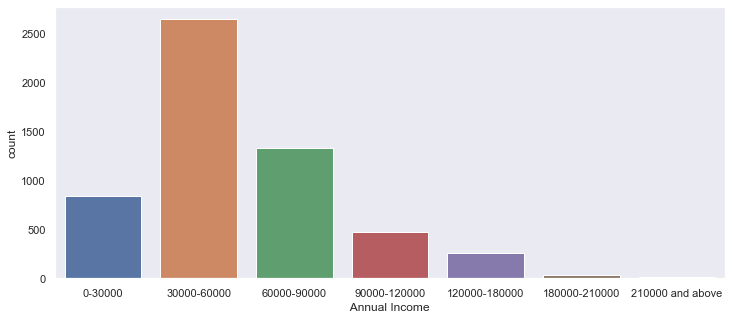

In [30]:
# Bivariate Analysis for Annual Income against Loan Status as "Charged Off"
plt.figure(figsize=(12, 5),facecolor='w')
B = sns.countplot(AnnulIncomeAndLoanStatus.Annual_income_derived)
B.set_xlabel(' Annual Income ')

# Annual Income in the range 30000-60000 has high charged-Off
# And no charge off in the range 210000 and above

In [31]:
AnnulIncomeAndLoanStatus.Annual_income_derived[AnnulIncomeAndLoanStatus.loan_status=='Charged Off'].value_counts().sort_values(ascending=False).head(30)

30000-60000         2641
60000-90000         1329
0-30000              839
90000-120000         470
120000-180000        257
180000-210000         36
210000 and above      12
Name: Annual_income_derived, dtype: int64

In [32]:
# Analysing with the Loan Purpose

Loan_Purpose_count = loan.purpose[loan.loan_status == 'Charged Off'].value_counts()
loan_ChargedOff_count = loan.purpose[loan.loan_status == 'Charged Off'].count()
ChargedOff_prop = Loan_Purpose_count/loan_ChargedOff_count
print(ChargedOff_prop)
print("The charged Off is high for the loan purpose : debt_consolidation")

debt_consolidation    0.492837
other                 0.112643
credit_card           0.096168
small_business        0.084527
home_improvement      0.060530
major_purchase        0.039398
car                   0.028653
medical               0.018983
wedding               0.016834
moving                0.016297
house                 0.010387
educational           0.009850
vacation              0.009491
renewable_energy      0.003403
Name: purpose, dtype: float64
The charged Off is high for the loan purpose : debt_consolidation


<AxesSubplot:xlabel='purpose', ylabel='loan_amnt'>

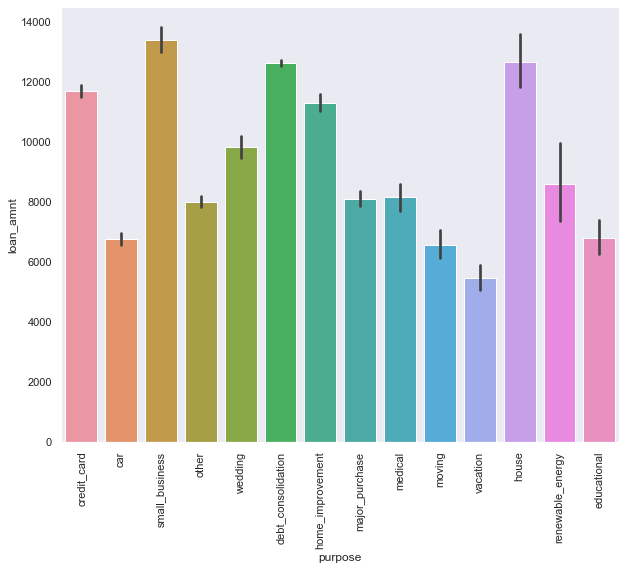

In [33]:
# Finding the highest loan amount provided for 'purpose'
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.barplot(y='loan_amnt', x='purpose', data=loan)


From the above chart , it is clear that the loan amount provided for the small_business is higher than others.

Text(0, 0.5, 'Purpose of the Loan')

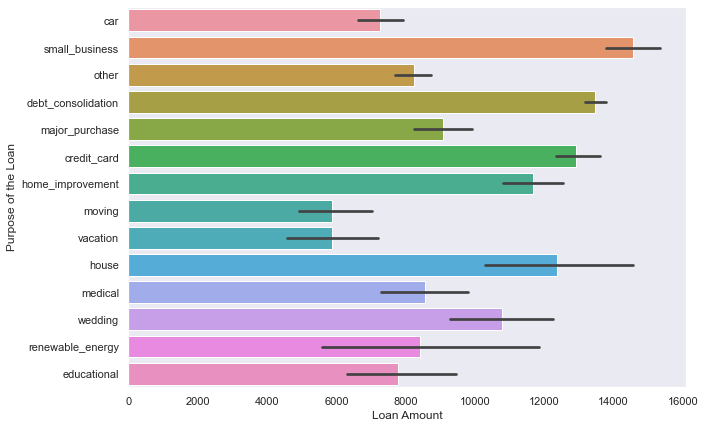

In [34]:
# Bivariate Analysis
# Analysing the loan amount provided against the purpose for the loan_satus as 'Charged Off'

plt.figure(figsize=(10,7))
B = sns.barplot(y='purpose', x='loan_amnt', data=loan[loan.loan_status=='Charged Off'])
B.set_xlabel('Loan Amount')
B.set_ylabel('Purpose of the Loan')

The loan amount provided is high for the purpose "small_business" when the status is "Charged Off"

Text(0, 0.5, 'Loan Amount')

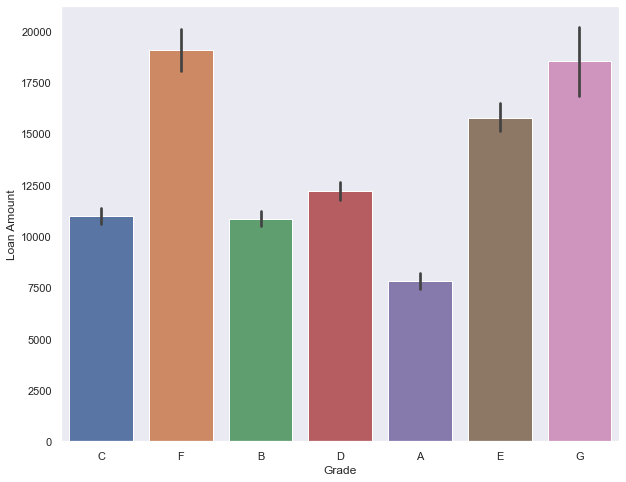

In [35]:
# Finding the highest loan amount provided for 'purpose'
plt.figure(figsize=(10,8))
b = sns.barplot(y='loan_amnt', x='grade', data=loan[loan.loan_status=='Charged Off'])
b.set_xlabel('Grade')
b.set_ylabel('Loan Amount')

The Loan amount provided for the F grade applicant is higher than the others for the 'Charged Off' status.

In [36]:
# Bivariate
# Checking which grade has the highest number of charged off

loan.grade[loan.loan_status=='Charged Off'].value_counts()

B    1414
C    1342
D    1112
E     704
A     601
F     312
G      99
Name: grade, dtype: int64

<AxesSubplot:>

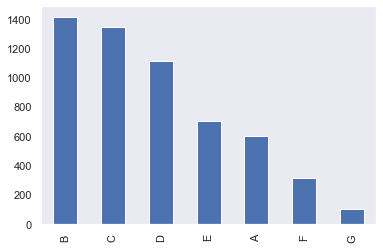

In [37]:
loan.grade[loan.loan_status=='Charged Off'].value_counts().plot(kind='bar')

# B is having the highest number of 'Charged Off'

So the Grades F,B and G are bringing loss to the business in various aspects.

<AxesSubplot:>

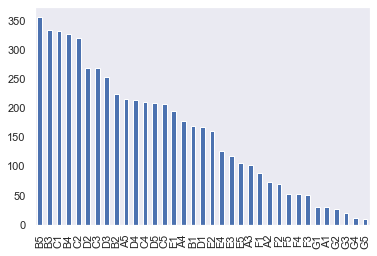

In [38]:
# Bivariate
# SubGrade against Loan Status
loan.sub_grade[loan.loan_status=='Charged Off'].value_counts().plot(kind='bar')



Subgrade B5 has the highest range of Charged Off

<AxesSubplot:xlabel='sub_grade', ylabel='loan_amnt'>

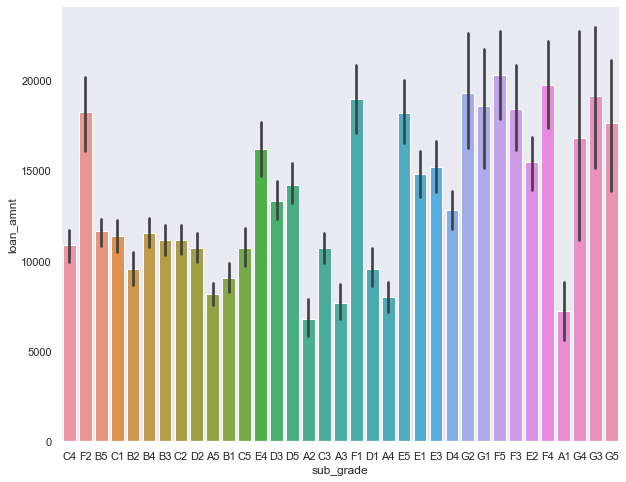

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(y=loan.loan_amnt[loan.loan_status=='Charged Off'],x=loan.sub_grade[loan.loan_status=='Charged Off'])

From the above the chart, we are able to see the subgrade F5 has the highest loan offered with more "charged off" Status.

In [40]:
# Bivariate
# Analysis on Interest Rate against "Charged Off" loan status

loan.int_rate[loan.loan_status=='Charged Off'].value_counts()



13.49    127
11.49    126
10.99     94
11.71     91
11.99     76
        ... 
23.59      1
23.22      1
18.07      1
8.63       1
22.94      1
Name: int_rate, Length: 331, dtype: int64

"charged Off" is high at the interest rate of 13.49%

More Charged Off has occured at the Interest Rate of 10%-15%

In [41]:
# Multivariate Analysis
# Interest Rate against Loan Status and Loan Amount
IntRateAndStatus = loan[['int_rate','loan_status','loan_amnt']]
IntRateAndStatus['binned_intRate']= pd.cut(loan.int_rate,[0,5,10,15,20,25],labels = ['0-5','5-10','10-15','15-20','20 and above'])
IntRateAndStatus.head()

,int_rate,loan_status,loan_amnt,binned_intRate
0,10.65,Fully Paid,5000,10-15
1,15.27,Charged Off,2500,15-20
2,15.96,Fully Paid,2400,15-20
3,13.49,Fully Paid,10000,10-15
4,12.69,Current,3000,10-15


Text(0, 0.5, 'Count')

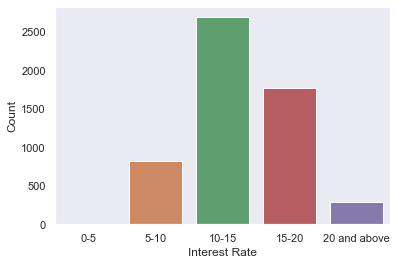

In [42]:
#Bivariate
#Interest Rate against "charged Off" status.
B = sns.countplot(x=IntRateAndStatus.binned_intRate[IntRateAndStatus.loan_status=='Charged Off'])
B.set_xlabel('Interest Rate')
B.set_ylabel('Count')

Text(0, 0.5, 'Loan Amount')

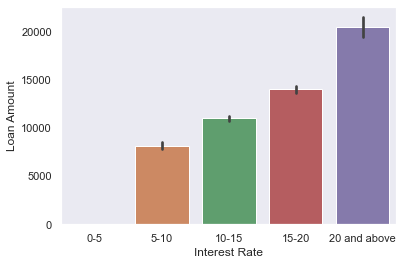

In [43]:
# Bar lot for Interst Rate against loanStatus and LoanAmount
b=sns.barplot(y=IntRateAndStatus.loan_amnt[IntRateAndStatus.loan_status=='Charged Off'],x=IntRateAndStatus.binned_intRate[IntRateAndStatus.loan_status=='Charged Off'])
b.set_xlabel('Interest Rate')
b.set_ylabel('Loan Amount')

So the loan amount provided is higher at the Interest category : 20% and above. And the charged off is also higher for the same.

Interest Rate less than 15% appers to be good for the profit of the company.

In [44]:
# Bivariate Analysis

#Employee length against 'Charged Off' LoanStatus

empLengthAndStatus = loan[['loan_amnt','loan_status','emp_length']]
empLengthAndStatus['binned_emplen'] = pd.cut(loan.emp_length,[0,2,4,6,8,10],labels = ['0 to 2', '2 to 4','4 to 6','6 to 8', '8 to 10'])
empLengthAndStatus.head()

,loan_amnt,loan_status,emp_length,binned_emplen
0,5000,Fully Paid,10,8 to 10
1,2500,Charged Off,1,0 to 2
2,2400,Fully Paid,10,8 to 10
3,10000,Fully Paid,10,8 to 10
4,3000,Current,1,0 to 2


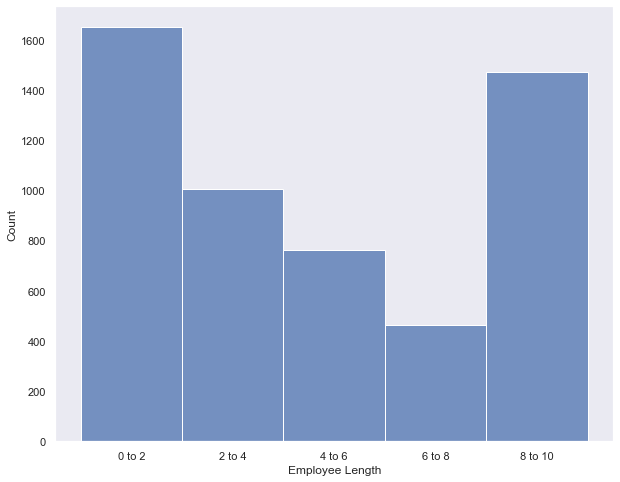

In [45]:
# Bivariate Analysis
# Employee length against 'Charged Off' LoanStatus with the Loan Amount
# plotting the hist plot for the above

plt.figure(figsize=(10,8))
B = sns.histplot(empLengthAndStatus.binned_emplen[empLengthAndStatus.loan_status=='Charged Off'])
B.set_xlabel('Employee Length')
plt.show()
#sns.barplot(x='binned_emplen',y='loan_amnt',data=empLengthAndStatus[empLengthAndStatus.loan_status=='Charged Off'])



The above hist plot shows that the Charged Off is higher at the Employee Length Category of 0-2 Years

Text(0.5, 0, 'Address State')

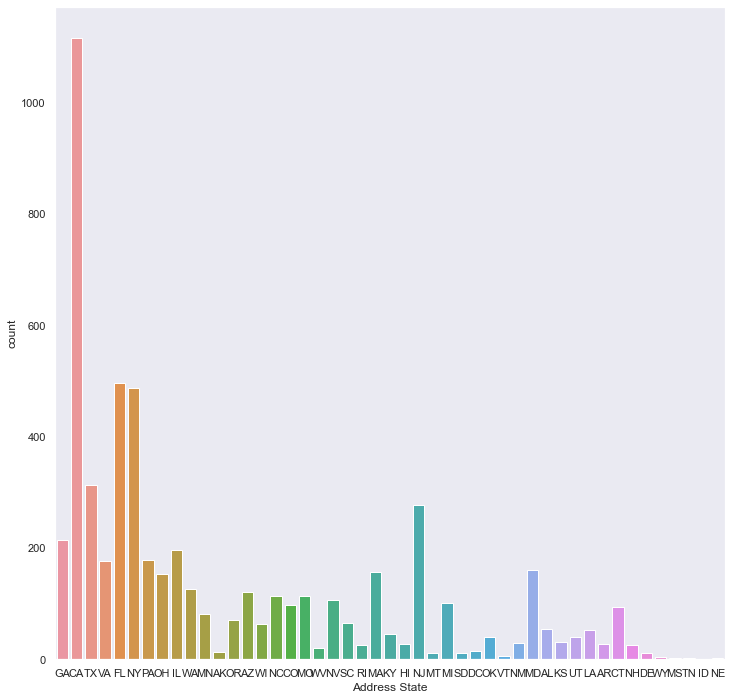

In [46]:
# Bivariate Analysis

# Address State against Loan Status
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,12))
AddrStateAndStatus = loan[['loan_status','addr_state','loan_amnt']]
AddrStateAndStatus.head()
b=sns.countplot(AddrStateAndStatus.addr_state[AddrStateAndStatus.loan_status=='Charged Off'])
b.set_xlabel('Address State')

So the above chart shows that the charged off is high for state CA. And let us also analyze the State with loan Amount

<AxesSubplot:xlabel='addr_state', ylabel='loan_amnt'>

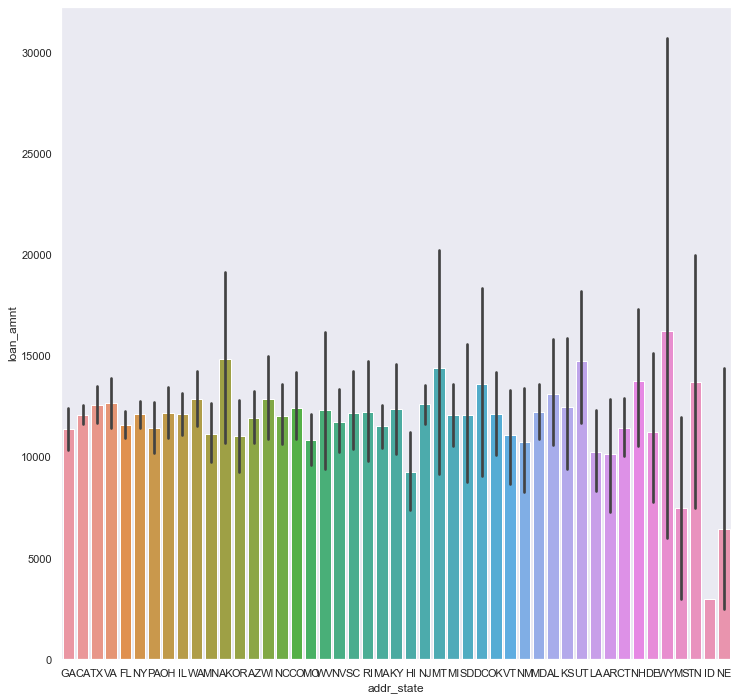

In [47]:
# Bivariate
# State Address and Loan Amount where the loan status is "Charged Off"
plt.figure(figsize=(12,12))
AddrStateAndStatus['loan_amnt'] = loan.loan_amnt
sns.barplot(x='addr_state',y='loan_amnt',data=AddrStateAndStatus[AddrStateAndStatus.loan_status == 'Charged Off' ])

So the state WY has the highest number of loan amount with 'Charged Off'

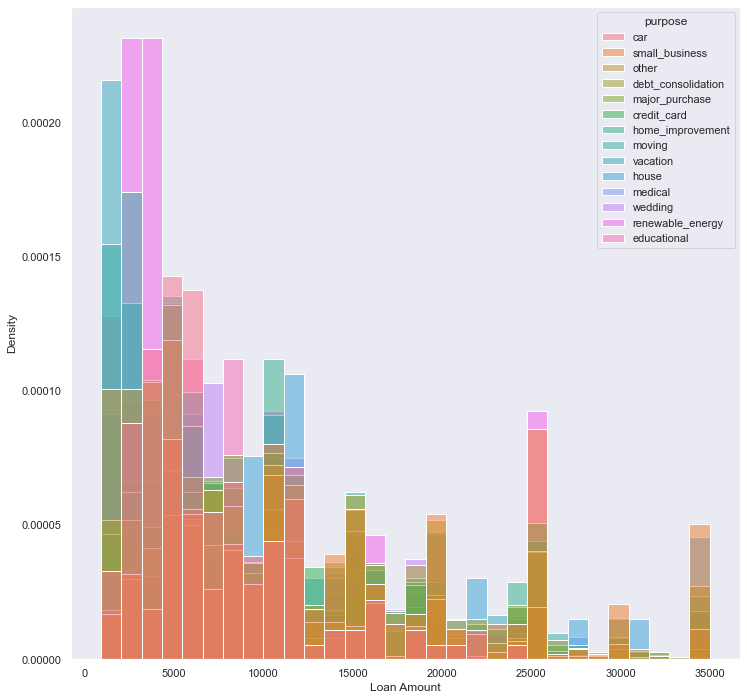

In [48]:
# Bivariate

plt.figure(figsize=(12,12))
B = sns.histplot(
    loan[loan.loan_status=='Charged Off'], x="loan_amnt", hue="purpose", element="bars",
    stat="density", common_norm=False)
B.set_xlabel('Loan Amount')
plt.show()

The Plot shows the "small business" has the highest number of "charged off"

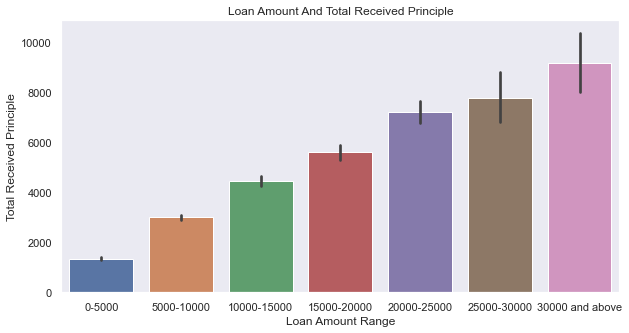

In [49]:
# Total principle received against Loan Amount when loan status is 'Charged Off'
#AnnulIncomeAndLoanStatus['loan_amnt_derived'] = pd.cut(loan['loan_amnt'][loan.loan_status=='Charged Off'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000','25000-30000', '30000 and above'])
plt.figure(figsize=(10,5))
AnnulIncomeAndLoanStatus['total_rec_prncp'] = loan.total_rec_prncp.apply(pd.to_numeric)
B = sns.barplot(y='total_rec_prncp',x='loan_amnt_derived',data=AnnulIncomeAndLoanStatus[AnnulIncomeAndLoanStatus.loan_status == 'Charged Off' ])
B.set_xlabel('Loan Amount Range')
B.set_ylabel('Total Received Principle')
B.set_title('Loan Amount And Total Received Principle')
plt.show()

From the above chart , we are able to see the total principle recieved is higher at the range of 30000 and above.

In [50]:
#loan.revol_util = loan.revol_util.apply(lambda x:str(x).replace('%','')).fillna(0)
#loan.revol_util.apply(lambda x:float(x))
loan.revol_util = loan.revol_util.astype(float)
loan.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

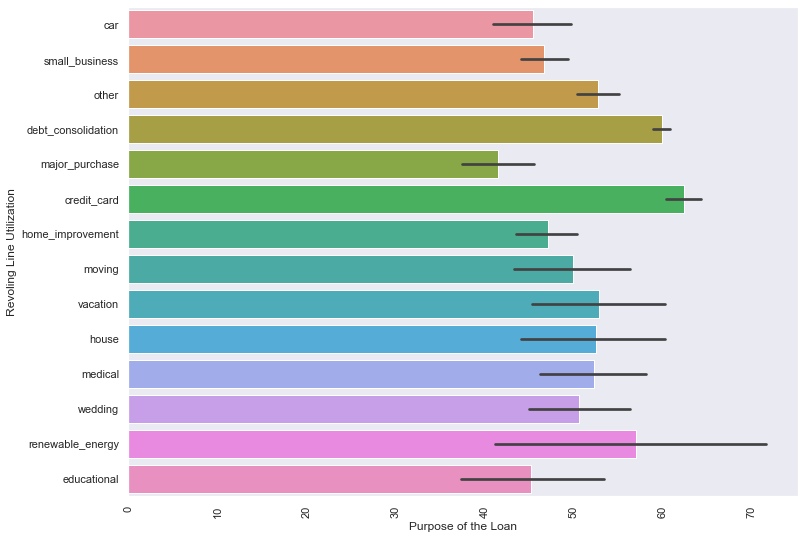

In [51]:
#loan purpose against revolving line utilization
#revol_util_df.head(30)
plt.figure(figsize=(12,9))
B = sns.barplot(y='purpose',x='revol_util',data=loan[loan.loan_status=='Charged Off'])
B.set_xlabel("Purpose of the Loan")
B.set_ylabel("Revoling Line Utilization")
plt.xticks(rotation=90)
plt.show()

The above chart is showing that the 'major_purpose' is less used for Revolving Line Utilization when the status is 'Charged Off'

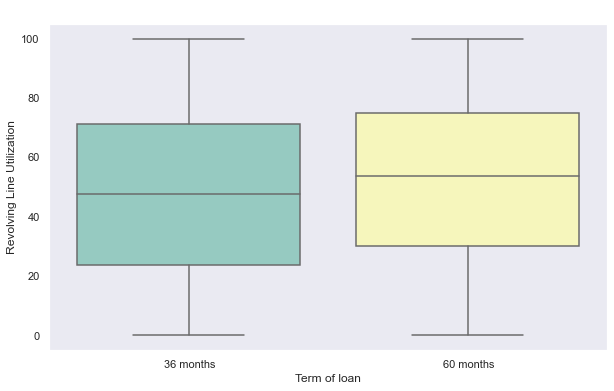

In [52]:
# Bivariate Analysis
# Box Plot
# Revolving Line Utilization against Interest Rate


plt.figure(figsize=(10,6))
B = sns.boxplot(y='revol_util', x='term', data =loan,palette='Set3')
B.set_title('Revolving Line Utilization Against Interest Rate',fontsize=15,color='w')
B.set_ylabel('Revolving Line Utilization')
B.set_xlabel('Term of loan')
plt.show()
# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

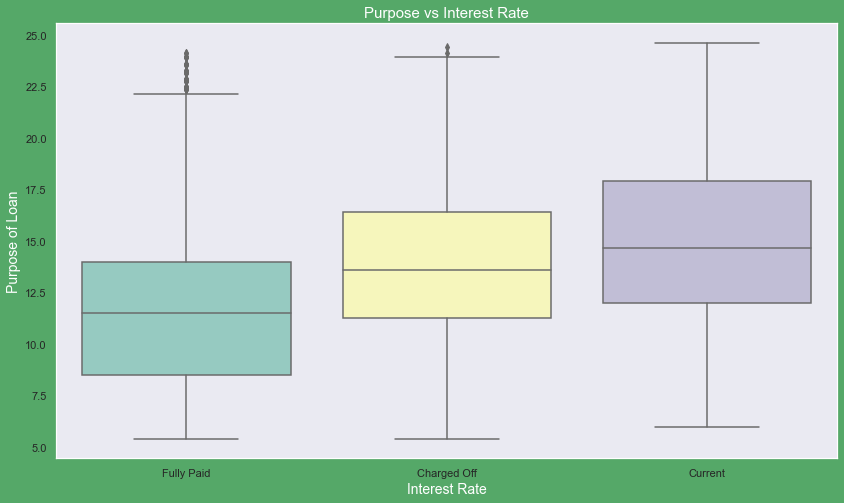

In [53]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='g')
loan.int_rate=loan.int_rate.apply(lambda x:str(x).rstrip('%')).astype(float)
B = sns.boxplot(y='int_rate', x='loan_status', data =loan,palette='Set3')
B.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
B.set_xlabel('Interest Rate',fontsize=14,color = 'w')
B.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

# Take aways:
# The "charged off" status is higher at the interest rate ranging from 11% to 17%

In [54]:
max(loan.dti)
#The max dti is 29.99, so binning it from 0 to 30
loan['dti'] = loan['dti'].astype(float)
loan['binned_dti'] = pd.cut(loan.dti,[0,5,10,15,20,25,30],labels=['0 to 5','5 to 10','10 to 15','15 to 20','20 to 25','25 to 30'])
loan[['dti','binned_dti']].head()

,dti,binned_dti
0,27.65,25 to 30
1,1.00,0 to 5
2,8.72,5 to 10
3,20.00,15 to 20
4,17.94,15 to 20


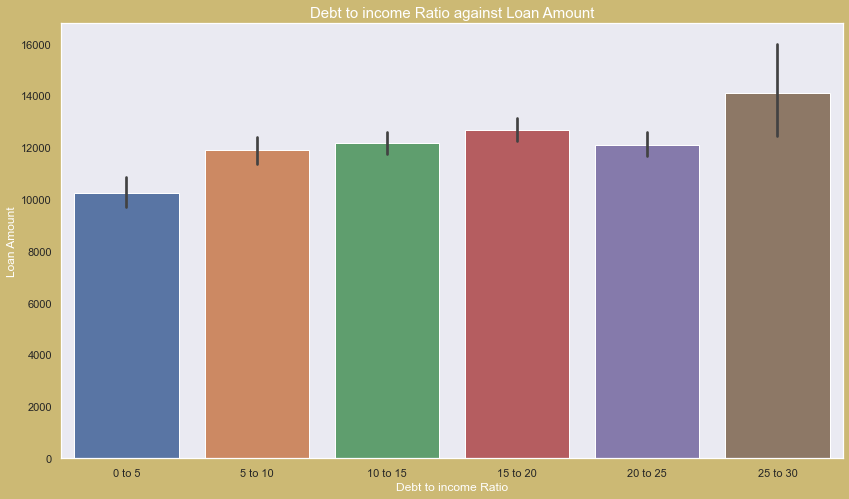

In [55]:
# Multivariate Analysis- dti against Loan Amount when the status is charged off
# Bar plot
plt.figure(figsize=(14,8),facecolor='y')
loan.loan_amnt = loan.loan_amnt.apply(pd.to_numeric)
B = sns.barplot(y='loan_amnt', x='binned_dti', data =loan[loan.loan_status=='Charged Off'])
B.set_title('Debt to income Ratio against Loan Amount',fontsize=15,color='w')
B.set_ylabel('Loan Amount',fontsize=12,color = 'w')
B.set_xlabel('Debt to income Ratio',fontsize=12,color = 'w')
plt.show()

# The chart is showing that the loan Amount is higher when for more dti.
# As per the Analysis the loan amount should be reduced when dti is more to get a better benefit for the company.

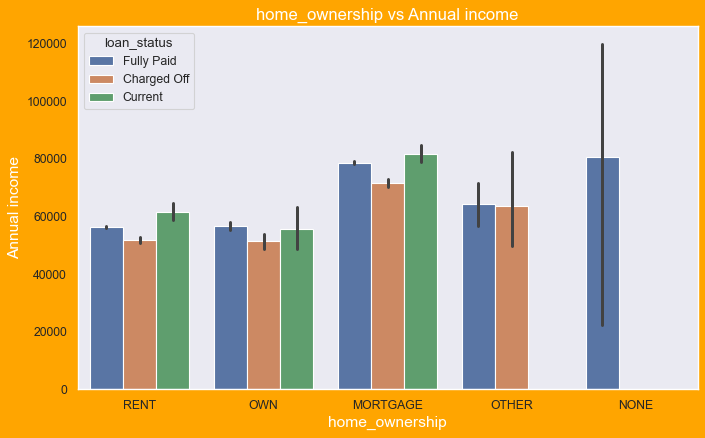

In [56]:
# Multivariate Analysis for Annual Income against Home Ownership when loanStatus is 'Charged Off'
loan['annual_inc'] = loan.annual_inc.apply(pd.to_numeric)
plt.figure(figsize=(10,6), dpi=80, facecolor='orange')
B=sns.barplot(x='home_ownership', y='annual_inc', hue="loan_status", data=loan)
B.set_title('home_ownership vs Annual income',fontsize=15,color='w')
B.set_ylabel('Annual income',fontsize=14,color = 'w')
B.set_xlabel('home_ownership',fontsize=14,color = 'w')
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
# who'paid fully' for each and every grade (i.e. at same interest range)

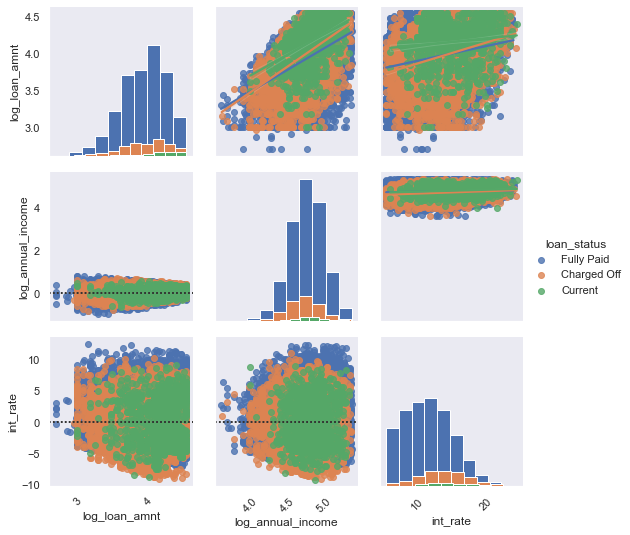

In [57]:
# Multivariable Analysis using pairGrid
# Taking the log base 10 value for the loan Amount and annual income as these columns are having more digits and difficult to analyse
loan['log_loan_amnt'] = np.log10(loan['loan_amnt'])
loan['log_annual_income'] = np.log10(loan['annual_inc'])
PG = sns.PairGrid(loan[["log_loan_amnt", "log_annual_income", "int_rate", "loan_status"]], hue="loan_status") 
PG.map_upper(sns.regplot) 
PG.map_lower(sns.residplot) 
PG.map_diag(plt.hist) 
for B in PG.axes.flat: 
    plt.setp(B.get_xticklabels(), rotation=45) 
PG.add_legend() 
PG.set(alpha=0.5)

Conclusion from the above:

1. Loan Amount provided is in higher range for the higher interest rate and the charged off is also high
2. Low Annual Income and High Interest rate is also lead to Charged Off
3. Less Loan Amount is provided when Annual Income is low. Loan status is Charged Off when high Loan Amount is provided for Low Annual Income
4. Charged Off is high when the Interest Rate is provided in higher range for the person with Low Annual income.

Recommendations : 

1. Providing the appropriate Interest rate would avoid the charge off
2. Providing low interest rate to the person with low income can decrease the “charged off”
3. Providing less loan amount to low incomed person can avoid the “charged off”
4. Low Interest to Low incomed person can avoid the “Charged Off”
5. Considering the DTI, providing more loans to the applicant having poor DTI can lead to the loss. So we can avoid that.